# **ALAN NUZULAN**
### **2009106032**
### **POSTTEST 8 KB**

# **IMPORT LIBRARY**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers,optimizers
import numpy as np
import matplotlib.pyplot as plt

# **LOAD DATASET**

In [2]:
data, info = tfds.load('beans', split='train+test', shuffle_files=True, with_info=True,as_supervised=True)

In [3]:
#lihat informasi dari data
print("Nama Dataset : ", info.name)
print("Image Feature : ", info.features["image"])
print("Jumlah Data Train : ", info.splits["train"].num_examples)
print("Jumlah Data Test : ", info.splits["test"].num_examples)

Nama Dataset :  beans
Image Feature :  Image(shape=(500, 500, 3), dtype=tf.uint8)
Jumlah Data Train :  1034
Jumlah Data Test :  128


# **MENAMPILKAN DATA IMAGE** 

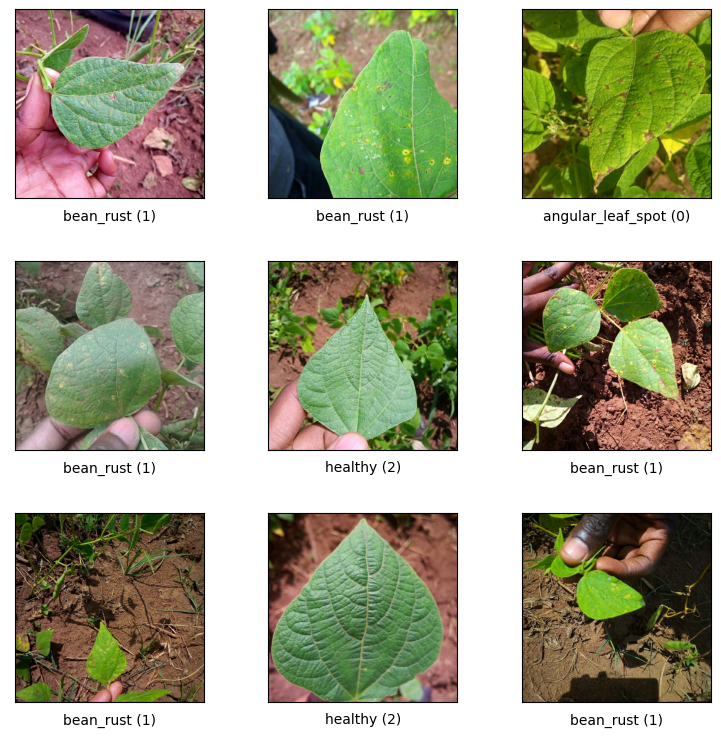

In [4]:
vis = tfds.visualization.show_examples(data, info)

- Resize

In [19]:
def resize(image, label):
    image = tf.image.resize(image, [224,224])
    return(image, label)

data = data.map(resize) #jadi semua data diresize

- Normalisasi

In [6]:
data = data.map(lambda x,y : (x/255,y))

- Batch

In [7]:
data = data.batch(32) #untuk pengelompokkan data

- One Hot

In [20]:
def one_hot(image, label) :
    label = tf.one_hot(tf.cast(label, tf.int32),3)
    label = tf.cast(label, tf.float32)
    return image, label

In [21]:
data = data.map(one_hot)

# Buat Model

In [10]:
modelCNN = tf.keras.Sequential()

In [11]:
#input layer
modelCNN.add(tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)))

#hidden layer
modelCNN.add(tf.keras.layers.MaxPool2D())
modelCNN.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
modelCNN.add(tf.keras.layers.MaxPool2D(4,4))
modelCNN.add(tf.keras.layers.Flatten())

modelCNN.add(tf.keras.layers.Dense(256, activation='relu'))

#output
modelCNN.add(tf.keras.layers.Dense(3, activation='sigmoid'))

In [12]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 11664)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [13]:
modelCNN.compile(
    "adam",
    "categorical_crossentropy",
    ["accuracy"]
)

In [14]:
history = modelCNN.fit(data, epochs=5,batch_size=32)

Epoch 1/5
37/37 [==============================] - 58s 2s/step - loss: 1.1480 - accuracy: 0.4277
Epoch 2/5
37/37 [==============================] - 102s 3s/step - loss: 0.8991 - accuracy: 0.5972
Epoch 3/5
37/37 [==============================] - 111s 3s/step - loss: 0.7199 - accuracy: 0.7048
Epoch 4/5
37/37 [==============================] - 75s 2s/step - loss: 0.5807 - accuracy: 0.7590
Epoch 5/5
37/37 [==============================] - 77s 2s/step - loss: 0.4474 - accuracy: 0.8296


# **MODEL EVALUATE**

In [15]:
score = modelCNN.evaluate(data,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

37/37 [==============================] - 23s 588ms/step - loss: 0.3484 - accuracy: 0.8744
Test Loss    : 0.348363995552063
Test Akurasi : 87.44 %


# **PREDIKSI MODEL**

In [16]:
predictions = modelCNN.predict(data)

37/37 [==============================] - 23s 592ms/step
